In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("login_hours.csv")

In [4]:
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])

In [5]:
number_of_days = df["car_number"].value_counts()
number_of_days = number_of_days.sort_index()

In [16]:
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()

In [18]:
df1 = pd.concat([number_of_days,total_login_hours],axis=1)
df1.columns = ['number_of_days', 'login_hours']
df1.head()

,number_of_days,login_hours
car_number,,
A29TV6235,8,9.846944
AP01TV0821,7,63.160556
AP01TV0906,28,236.926389
AP02TV1883,44,320.696389
AP02TV2215,8,55.156667


In [19]:
df2 = df1.head(2000)

In [32]:
df2["hours_per_day"] = df2["login_hours"]/df2["number_of_days"]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=2)

In [35]:
kmeans.fit(df2.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
df2["labels"] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    1360
1     640
Name: labels, dtype: int64

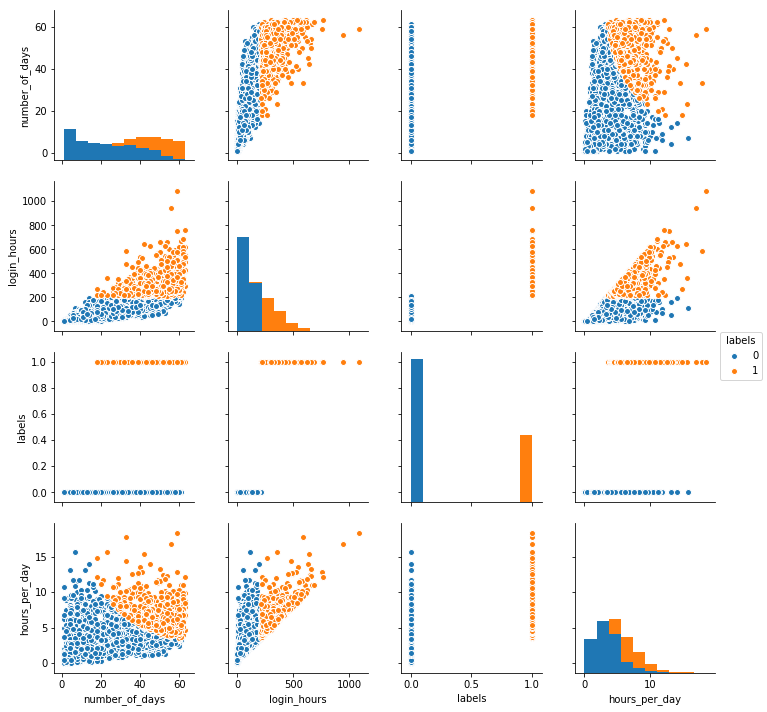

In [37]:
sns.pairplot(df2,hue="labels")
print("\n")
df2["labels"].value_counts()

In [38]:
df1 = df1[2000:]

In [39]:
df2 = df1.head(2000)

In [40]:
df2["hours_per_day"] = df2["login_hours"]/df2["number_of_days"]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
kmeans.fit(df2.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
df2["labels"] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    1379
1     621
Name: labels, dtype: int64

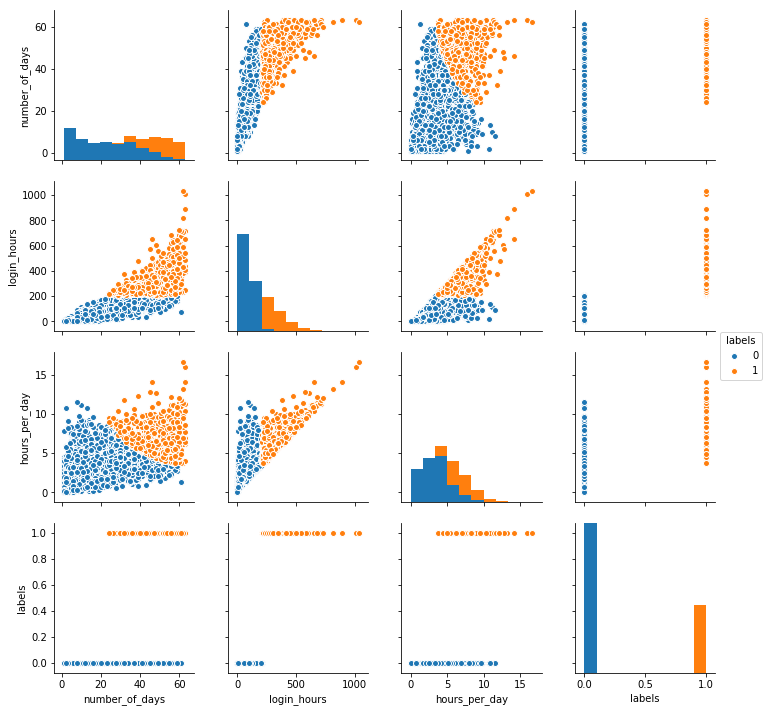

In [43]:
sns.pairplot(df2,hue="labels")
print("\n")
df2["labels"].value_counts()